<a href="https://colab.research.google.com/github/soymarwin/ee298z/blob/main/EE298Z_Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EE298Z Deep Learning**
## **Assignment 03**

Performed by Marwin B. Alejo 2020-20221

*Task: Implement AdaIN Style Transfer on SVHN (source) and MNIST (target) dataset.*

Resources and Tools:
1. Google Colab in GPU Mode
2. [GitHub](https://github.com/soymarwin/ee298z/blob/main/assignment03/)
3. PyTorch
4. Raw MNIST and SVHN Images. *(Pre-defined PyTorch datasets may also be used but requires different pre-processing.)*



**Execution training time.**

Disclaimer: Since Google Colab is the chosen platform in this assignment execution, training performance(speed) depends on your node of choice, plan, and internet connectivity. Better use Google Colab Pro or GCC node for faster compute time and longer training time node allocation.

1. ~1 hour in an ideal network speed and weather condition for 500-1000 iterations.<br>
2. ~2 hours for 10000 iterations. <br>
3. ~4 hours for 20000 iterations. <br>
3. ~6hours for 50000 iter and ~12 hours for 100000 iter. <br>

*Time spent for framework configuration trials and model composition is 10 days.*

**Disclaimer: It is not possible to perform a ~50000+ and iteration training due to the limits with Google Colab GPU node.**

Overall, AdaIN Style Transfer, unlike SGAN and CycleGAN, is more on artistic style transfer than value-based style transfer. This is seen with the outputs below and with the SGAN/CGAN as shown [here](https://github.com/yunjey/mnist-svhn-transfer) fore benchmarking. Artistic means that the style of the prvious is transfer to the latter (target) while in SGAN and CGAN, the vaues are being complete similar to the former (source style). The train.py and test.oy are both modified as such they may accept both the raw style and target images regardless of their shape. Furthermore, the output is of the shape (3ch, 32px, 32px). 

Theoretically, the longer the model was trained, the better the style-transfer output would be. However, due to compute resource constraint and time limit allocation for Google Colab GPU connection, only up to 20000 iter was performed.

1. Connect Google Colab to Google Drive.

In [11]:
import os
import sys
import scipy.io as sio
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
path = "/content/drive/MyDrive/Colab/EE298Z_Assignment03/data/"
sys.path.append(path)

Mounted at /content/drive


2. Get MNIST and SVHN Datasets and directory preparation.

In [ ]:
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz

In [ ]:
!tar -xzvf "/content/drive/MyDrive/Colab/EE298Z_Assignment03/data/mnist_png.tar.gz" -C "/content/drive/MyDrive/Colab/EE298Z_Assignment03/data/contents/" 

In [ ]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat 

In [ ]:
dir_name = "/content/drive/MyDrive/Colab/EE298Z_Assignment03/data/style/"
print("Loading matlab data of SVHN")
mat = sio.loadmat("/content/drive/MyDrive/Colab/EE298Z_Assignment03/data/train.mat")
data = mat['X']
for i in range(data.shape[3]):
  plt.figure()
  if not os.path.isfile(os.path.join(dir_name, "%05d.png" % i)):
    plt.imsave(os.path.join(dir_name, "%05d.png" % i), data[..., i])
  plt.close()
print("Program done!")

**Sample Target**

sample_target.png

**Sample Style**

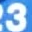

3. Training with 500 iterations.

In [ ]:
!python /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/train.py --content-dir /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/contents/ --style-dir /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/styles/ --max-iter 5000

4. Test with weights from 500 iterations on single image.

In [ ]:
!python /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/test.py --model /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/experiments/iter_500.pth --content /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/contents/9999.png --style /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/styles/09999.png

[1/1] Content: /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/contents/9999.png, Style: /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/styles/09999.png


**Styled Image in 500 iter**

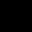

5. Training with 10000 iterations

In [ ]:
!python /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/train.py --content-dir /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/contents/ --style-dir /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/styles/ --max-iter 10000

2020-12-08 17:31:59.753333: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
100% 10000/10000 [52:31<00:00,  3.17it/s]


6. Testing with single image and generated weight from 10000 iterations.

In [ ]:
!python /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/test.py --model /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/experiments/iter_10000.pth --content /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/contents/25.png --style /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/styles/00003.png

[1/1] Content: /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/contents/25.png, Style: /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/styles/00003.png


**Styled Image in 10000 iter**

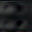

7. Training with 20000 iterations

In [ ]:
!python /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/train.py --content-dir /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/contents/ --style-dir /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/styles/ --max-iter 20000

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100% 548M/548M [00:40<00:00, 14.3MB/s]
2020-12-09 02:56:50.605376: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
  1% 131/20000 [03:46<10:15:14,  1.86s/it]
  3% 680/20000 [19:42<7:36:20,  1.42s/it] 

100% 20000/20000 [3:32:07<00:00,  1.57it/s]


8. Testing with single image using 20000 iterations weight.

In [12]:
!python /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/test.py --model /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/experiments/iter_20000.pth --content /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/contents/30.png --style /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/styles/00003.png

[1/1] Content: /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/contents/30.png, Style: /content/drive/MyDrive/Colab/EE298Z_Assignment03/data/styles/00003.png


**Styled Image in 20000 iter**

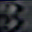

## **TODO (for future explorers)**

1. Unified preprocessing (environment preparation) on Google Colab.
2. Training using [extra set of SVHN cropped](http://ufldl.stanford.edu/housenumbers/extra_32x32.mat). 
3. Training and testing using PyTorch's in-house [MNIST and SVHN datasets](https://pytorch.org/docs/stable/torchvision/datasets.html).


## **References**

1. [Original paper of Huang and Belongie](https://arxiv.org/abs/1703.06868)
2. [PyTorch Documentation](https://pytorch.org/docs/stable/index.html)
3. [AdaIN TF-K implemetation](https://github.com/ftokarev/tf-adain)
4. [AdaIN PyTorch implementation](https://github.com/naoto0804/pytorch-AdaIN)
5. [Basis: AdaIN PyTorch implementation](https://github.com/kukosmos/adain-pytorch-2019)